In [8]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import datetime

## Step One: Define the time series data

In [16]:
df = pd.read_csv('./data/data.csv',)

# Make sure all the dates are in order
df['Date'] = pd.to_datetime(df['Date']) 
df.sort_values(by=['Date'], inplace=True, ascending=True)
df.head(10) # Print it out 

,Date,Number of Joints,Mass (grams),Time of First Use
0,2021-03-28,6.0,2.10,02:00 PM
1,2021-03-29,3.0,1.05,02:00 PM
2,2021-03-30,6.0,2.10,10:00 AM
3,2021-03-31,6.0,2.10,10:00 AM
4,2021-04-01,5.0,1.75,10:00 AM
5,2021-04-02,5.0,1.75,02:00 PM
6,2021-04-03,5.0,1.75,02:00 PM
7,2021-04-04,4.0,1.40,10:00 AM
8,2021-04-05,6.0,2.10,10:00 AM
9,2021-04-06,4.0,1.40,02:00 PM


## Step Two: Plot the time series data

In [28]:
def plot_substance_use(df, x_col, y_col, title, x_label, y_label, figsize=(12, 5), dpi=80, linewidth=10):
  # Create a figure and axis
  fig, ax = plt.subplots(figsize=figsize, dpi=dpi, linewidth=linewidth)

  # Plot the time series data as a scatter plot
  ax.plot(df[x_col], df[y_col])

  # Add a title and grid to the plot
  ax.set_title(title)

  # Label the axes
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)

  # Make the plot interactive then show it
  plt.ion()
  plt.show()

<IPython.core.display.Javascript object>


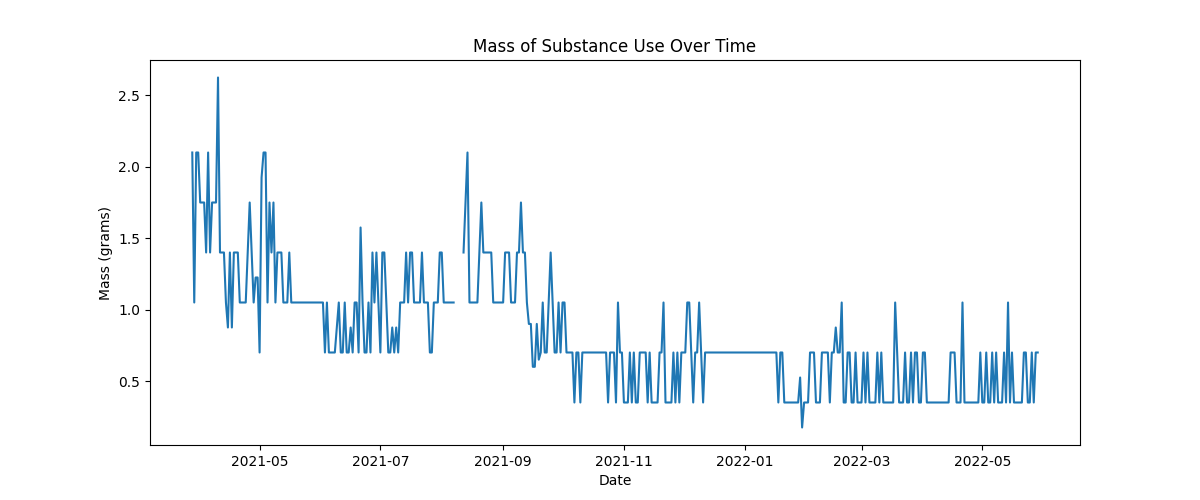

In [22]:

plot_substance_use(df, 'Date', 'Mass (grams)', 'Mass of SUbstance Use Over Time', 'Date', 'Mass (g)', figsize=(12, 5), dpi=80, linewidth=10)

<IPython.core.display.Javascript object>


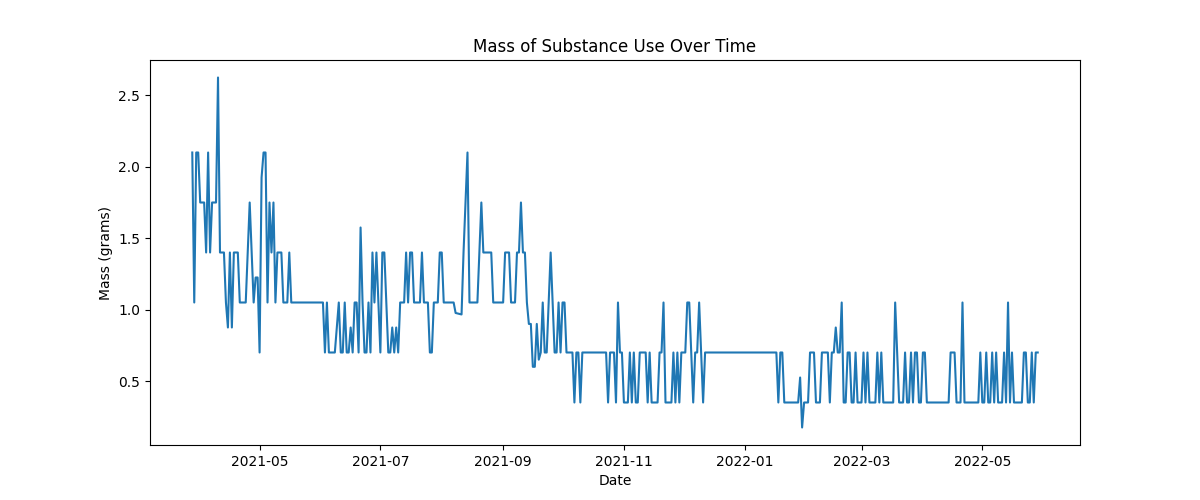

In [27]:
# Use interpolation to fill in gaps
df['interpolation'] = df['Mass (grams)'].interpolate(method='spline', order=3)

# Plot it again
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 5), dpi=80, linewidth=10)

# Plot the time series data as a scatter plot
ax.plot(df['Date'], df['interpolation'])

# Add a title and grid to the plot
ax.set_title('Mass of Substance Use Over Time')

# Label the axes
ax.set_xlabel('Date')
ax.set_ylabel('Mass (grams)')

# Make the plot interactive then show it
plt.ion()
plt.show()


## Step Three: Build a Model